# Predicting Heart Disease with K-NN and SVM

This notebook is a simple introduction to the K-NN and SVM algorithms using a heart disease dataset that can be found at https://data.world/informatics-edu/heart-disease-prediction.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Data

In [2]:
df = pd.read_csv('../input/heart-disease-prediction/Heart_Disease_Prediction.csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
df.shape

(270, 14)

In [6]:
# Checking for missing values.
df.isnull().values.any()

False

In [7]:
# Checking for imbalanced data based on sex.
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [8]:
# Checking for imbalanced data based on outcome.
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

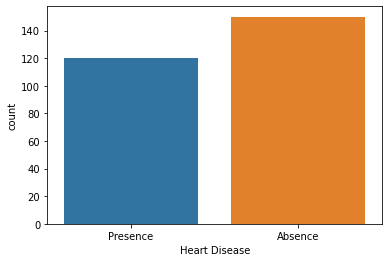

In [9]:
sns.countplot(x='Heart Disease', data=df)

In [10]:
# Checking for any correlations.
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


# K-Nearest Neighbours 

In [11]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [12]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [13]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

9.746794344808963

In [14]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [15]:
y_pred = classifier.predict(x_test)
y_pred

array(['Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Ab

In [16]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[43 12]
 [11 29]]


In [17]:
print(accuracy_score(y_test,y_pred))

0.7578947368421053


# SVM Model

In [18]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [19]:
y_pred = clf.predict(x_test)
y_pred

array(['Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absen

In [20]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[44 11]
 [11 29]]


In [21]:
print(accuracy_score(y_test,y_pred))

0.7684210526315789
